In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

# Importing relevant Testing Data and NN model Weights

In [14]:
# "Words" contains the subset of words we make predictions for. 
threewordsubset =  np.array(['hvad', 'ja', 'soed'])
words =  np.array(['hvad', 'ja', 'soed', 'mange', 'nej', 'nu', 'fordi', 'koebe', 'tid'])
label_map = {label:num for num, label in enumerate(words)}

# Path for saving processed Data Arrays
proc_data_path = "../VR_exportdata/"

In [15]:
def import_data(import_path):
    savedMod = load_model(str(import_path) + "nn_modelVR.h5")
    X_test = np.load(str(import_path) + "X_testVR.npy")
    y_test = np.load(str(import_path) + "y_testVR.npy")
    return savedMod, X_test, y_test

In [19]:
def nn_statistics(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred = tf.argmax(y_pred, axis=1)
    #y_test = tf.argmax(y_test, axis=1)

    #Normalized confusion matris
    conf_matrix = confusion_matrix(y_test, y_pred, normalize='true')
    return(conf_matrix, accuracy_score(y_test, y_pred))

In [20]:
model, X_test, y_test = import_data(proc_data_path)

In [21]:
confusion, accuracy = nn_statistics(model, X_test, y_test)
accuracy

2023-05-31 11:27:59.890584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2/2 [==============================] - 1s 654ms/step


0.9814814814814815

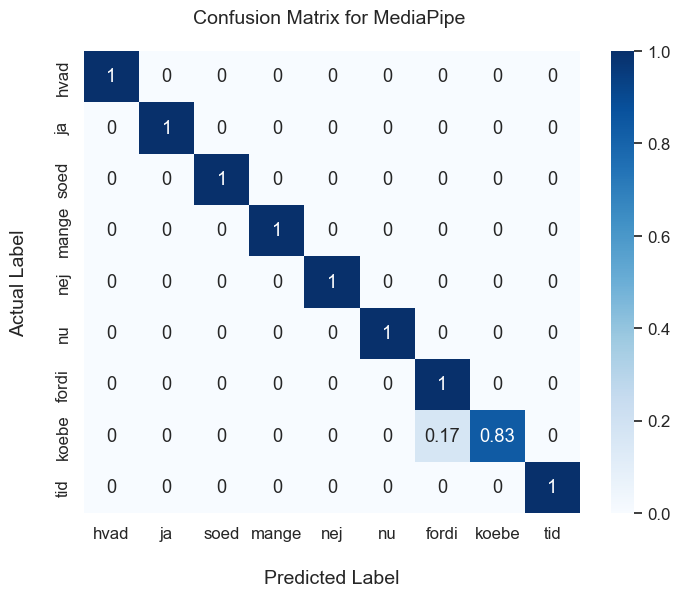

In [22]:
# Change figure size and increase dpi for better resolution
plt.figure(figsize=(8,6), dpi=100)
# Scale up the size of all text
sns.set(font_scale = 1.1)

# Plot Confusion Matrix using Seaborn heatmap()
# Parameters:
# first param - confusion matrix in array format   
# annot = True: show the numbers in each heatmap cell
# fmt = 'd': show numbers as integers. 
ax = sns.heatmap(confusion, annot=True,  cmap='Blues')

# set x-axis label and ticks. 
ax.set_xlabel("Predicted Label", fontsize=14, labelpad=20)
ax.xaxis.set_ticklabels(words)

# set y-axis label and ticks
ax.set_ylabel("Actual Label", fontsize=14, labelpad=20)
ax.yaxis.set_ticklabels(words)

# set plot title
ax.set_title("Confusion Matrix for MediaPipe ", fontsize=14, pad=20)
plt.savefig('confusion_matrix_MediaPipe.png', dpi=300, bbox_inches='tight')

In [11]:
file = open('soed23.csv')
file = file.read()
file = file.replace("\n", ",")
data = re.sub(r"[\([{})\]]", "", file)

npdata = np.fromstring(data, dtype=float, sep=',')
npdata = npdata.reshape(int(len(npdata)/144), 144)

num_rows, num_cols = npdata.shape
npdata = npdata[:-int(num_rows - 120)]

soedlabel = 8

In [12]:
npdata = npdata.reshape(1, 120, 144)

np.argmax(model.predict(npdata))

1/1 [==============================] - 1s 573ms/step


2